Import libraries

In [1]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Create dataset and train, validate, test sets

Found 332 files belonging to 3 classes.
Using 266 files for training.
Found 332 files belonging to 3 classes.
Using 66 files for validation.
Found 27 files belonging to 3 classes.


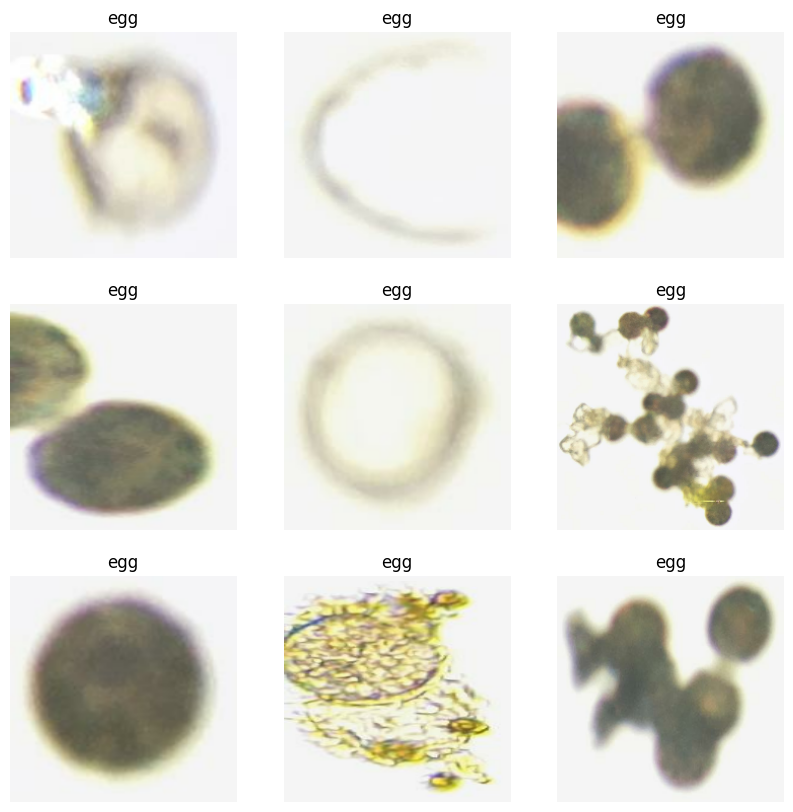

In [2]:
n_classes = 3

data_directory = "data"
testdata_directory = "testdata"
class_names = ['copepod', 'egg', 'nauplii']

trainset = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    class_names=class_names,
    image_size=(224,224),
    seed = 50, 
    subset = "training",
    validation_split = 0.2
)

valset = tf.keras.utils.image_dataset_from_directory(
  data_directory,
  validation_split=0.2,
  subset="validation",
  seed=50
)

testset = tf.keras.utils.image_dataset_from_directory(
  testdata_directory,
  seed=50,
  shuffle=False
)

plt.figure(figsize=(10, 10))
for images, labels in trainset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


Create and compile model

In [3]:
base_model = tf.keras.applications.ResNet50(weights="imagenet",
                                            include_top=False)

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)


model = tf.keras.Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
    layer.trainable = False

optimizer = tf.keras.optimizers.Adam(learning_rate=0.2)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

Train model

In [4]:
epochs = 15

history = model.fit(trainset,
                    epochs=epochs,
                    validation_data=valset)

Epoch 1/15


9/9 [==============================] - 20s 2s/step - loss: 18.0751 - accuracy: 0.6767 - val_loss: 3.1895 - val_accuracy: 0.9545
Epoch 2/15
9/9 [==============================] - 15s 2s/step - loss: 3.6533 - accuracy: 0.9361 - val_loss: 5.0443 - val_accuracy: 0.9545
Epoch 3/15
9/9 [==============================] - 16s 2s/step - loss: 1.7493 - accuracy: 0.9812 - val_loss: 4.9616 - val_accuracy: 0.9394
Epoch 4/15
9/9 [==============================] - 16s 2s/step - loss: 1.5977 - accuracy: 0.9774 - val_loss: 4.0990 - val_accuracy: 0.9394
Epoch 5/15
9/9 [==============================] - 16s 2s/step - loss: 0.4710 - accuracy: 0.9925 - val_loss: 1.1133 - val_accuracy: 0.9848
Epoch 6/15
9/9 [==============================] - 16s 2s/step - loss: 0.0328 - accuracy: 0.9962 - val_loss: 4.2162 - val_accuracy: 0.9394
Epoch 7/15
9/9 [==============================] - 16s 2s/step - loss: 0.0589 - accuracy: 0.9925 - val_loss: 1.8144 - val_accuracy: 0.9697
Epoch 8/15
9/9 [===============

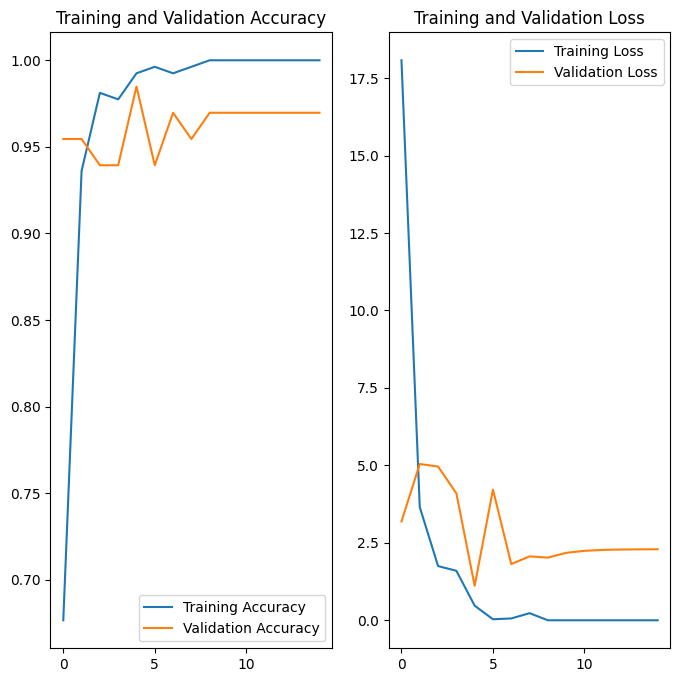

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Test on testset

In [6]:
predicted_class_names = []
testset_labels = []
tot_sum = 0

predictions = model.predict(testset)
predicted_batch = tf.squeeze(predictions).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
for id in predicted_ids:
    predicted_class_names.append(class_names[id])

for images, labels in testset:
    for id in labels:
        testset_labels.append(class_names[id])

for i in range(len(predicted_class_names)):
    if predicted_class_names[i] == testset_labels[i]:
        tot_sum += 1
    else:
        pass
print("accuracy = ", tot_sum/len(predicted_class_names))

1/1 [==============================] - 3s 3s/step
accuracy =  0.9629629629629629


Test on folder

1/1 [==============================] - 1s 978ms/step
[0. 1. 0.]


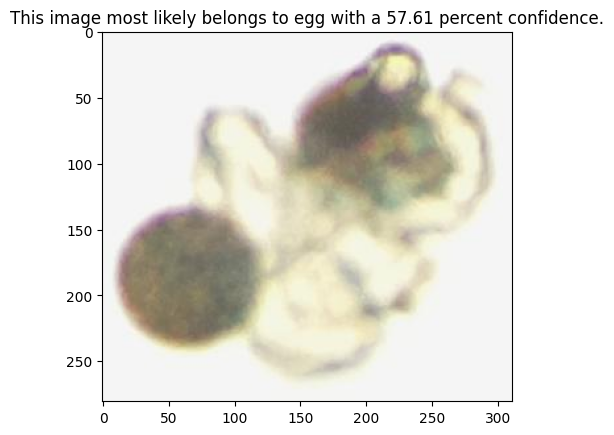

1/1 [==============================] - 0s 70ms/step
[0. 1. 0.]


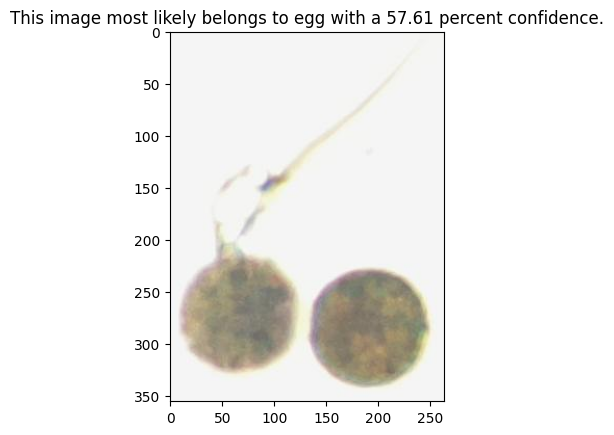

1/1 [==============================] - 0s 68ms/step
[0. 1. 0.]


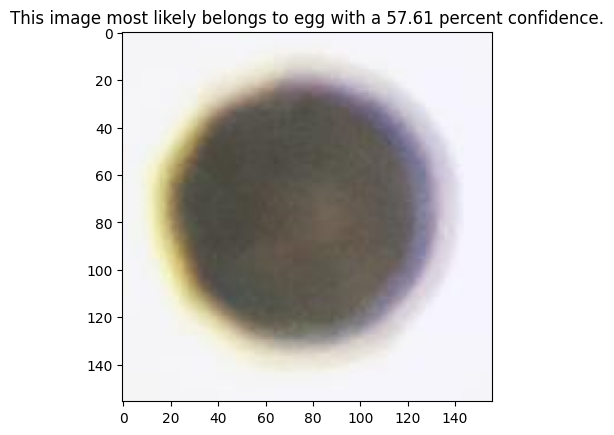

1/1 [==============================] - 0s 76ms/step
[0. 1. 0.]


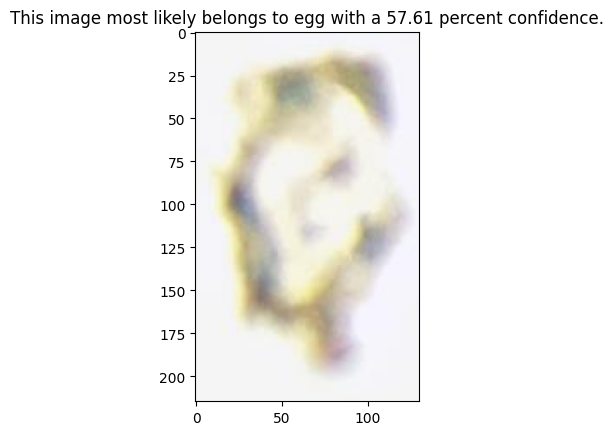

1/1 [==============================] - 0s 94ms/step
[0. 1. 0.]


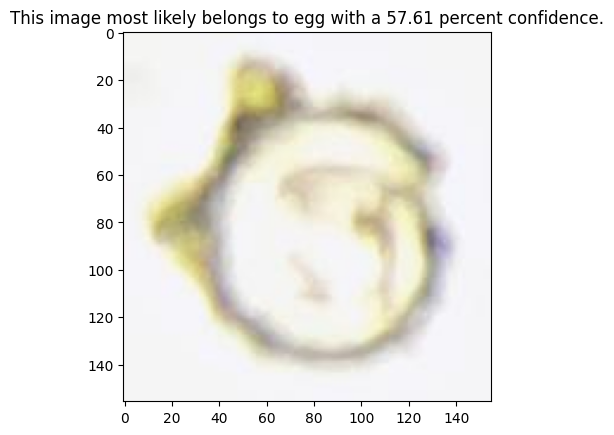

1/1 [==============================] - 0s 82ms/step
[0. 1. 0.]


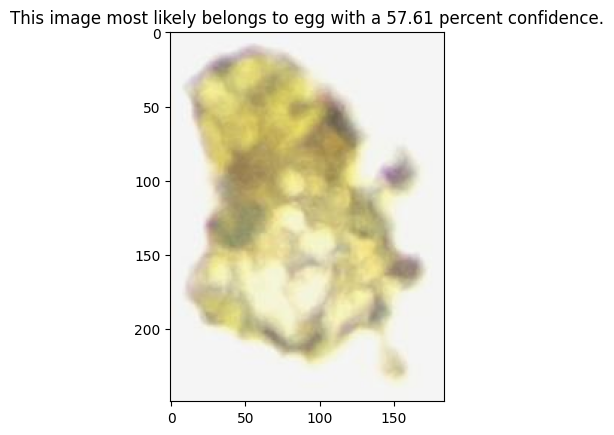

1/1 [==============================] - 0s 86ms/step
[0. 1. 0.]


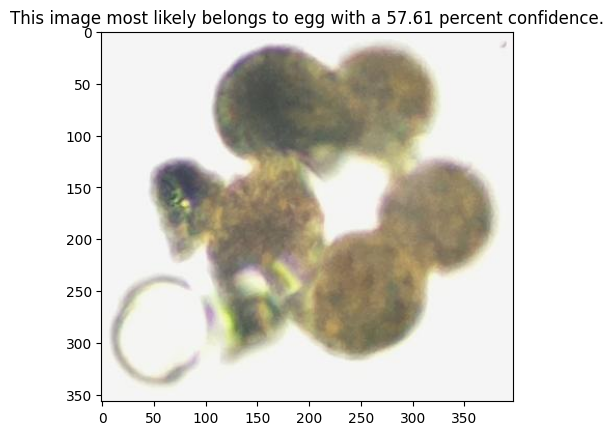

1/1 [==============================] - 0s 68ms/step
[0. 1. 0.]


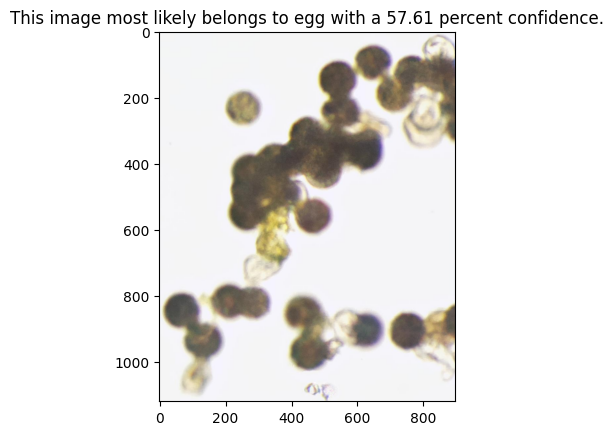

1/1 [==============================] - 0s 87ms/step
[0. 0. 1.]


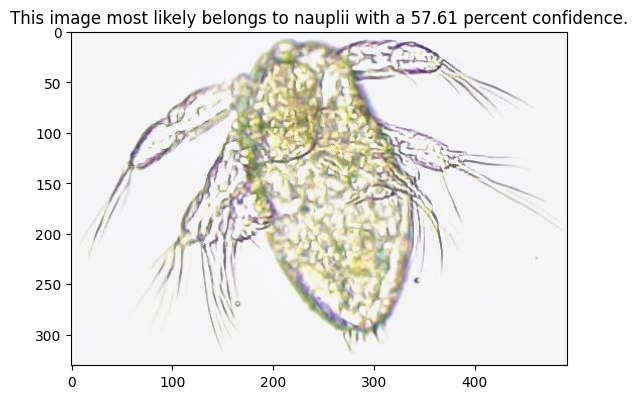

1/1 [==============================] - 0s 92ms/step
[0. 0. 1.]


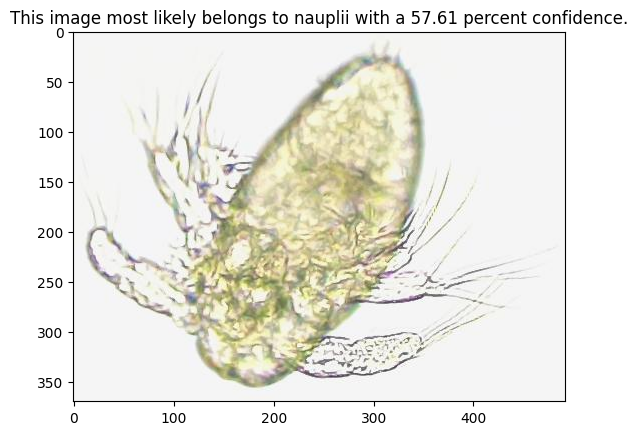

1/1 [==============================] - 0s 74ms/step
[0. 0. 1.]


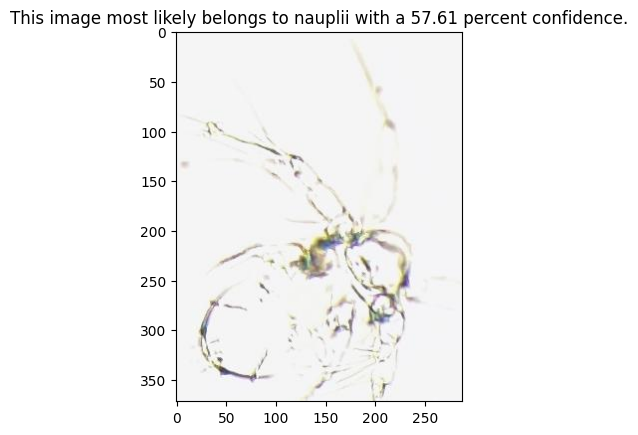

1/1 [==============================] - 0s 76ms/step
[0.0000000e+00 1.0079992e-33 1.0000000e+00]


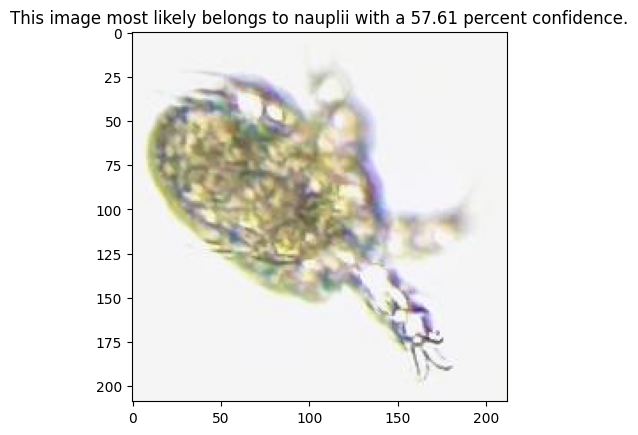

1/1 [==============================] - 0s 104ms/step
[0. 0. 1.]


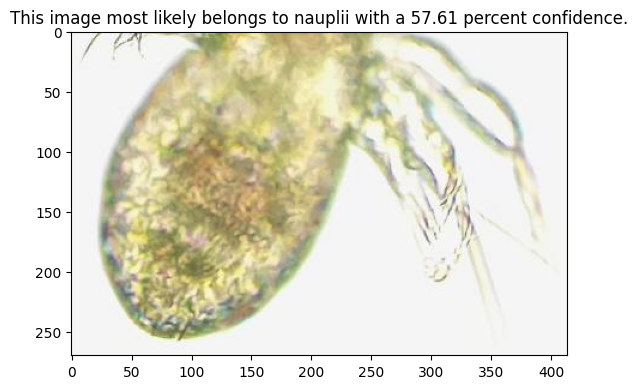

1/1 [==============================] - 0s 72ms/step
[0. 1. 0.]


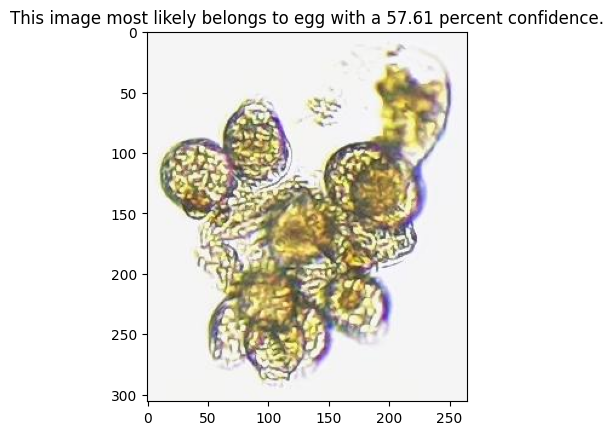

1/1 [==============================] - 0s 72ms/step
[0. 1. 0.]


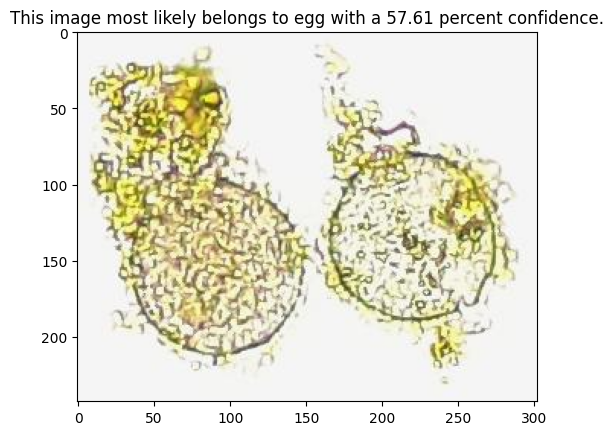

1/1 [==============================] - 0s 70ms/step
[1.00000000e+00 0.00000000e+00 1.11802914e-17]


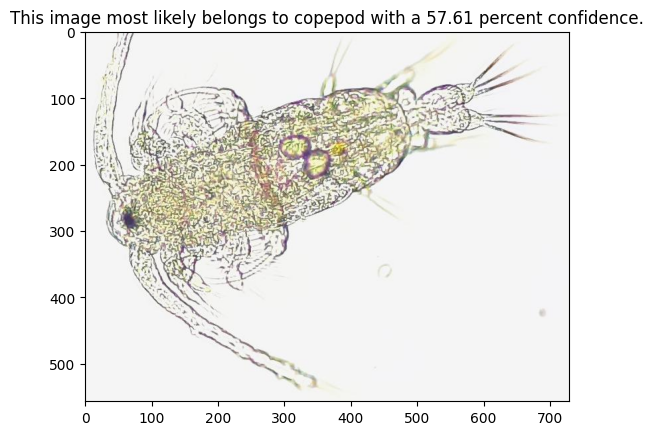

1/1 [==============================] - 0s 78ms/step
[0.000000e+00 1.000000e+00 9.858975e-25]


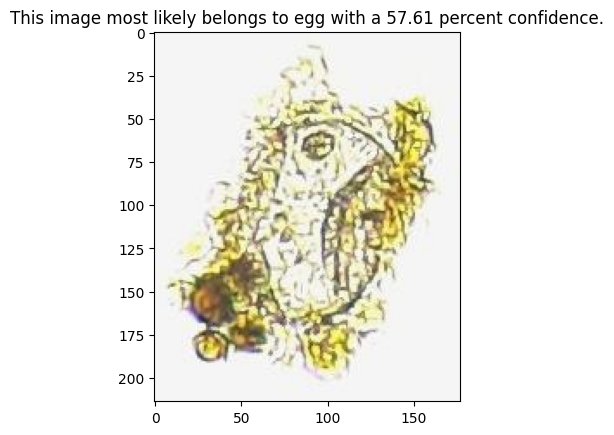

1/1 [==============================] - 0s 88ms/step
[0. 1. 0.]


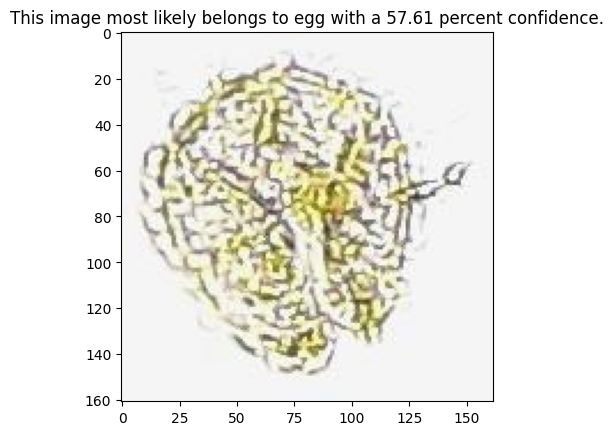

1/1 [==============================] - 0s 75ms/step
[0. 1. 0.]


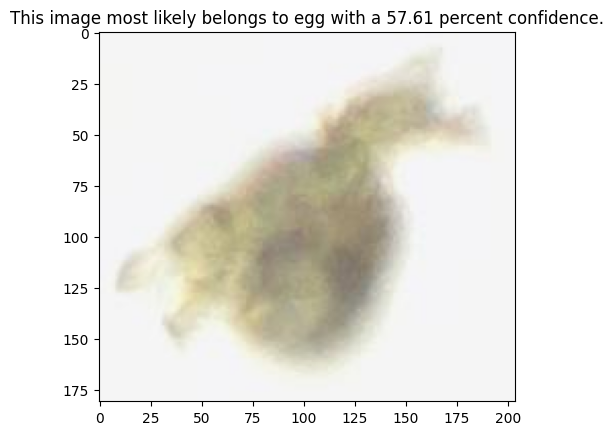

1/1 [==============================] - 0s 104ms/step
[1. 0. 0.]


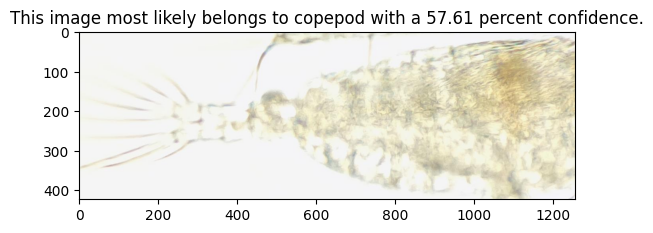

1/1 [==============================] - 0s 76ms/step
[0. 1. 0.]


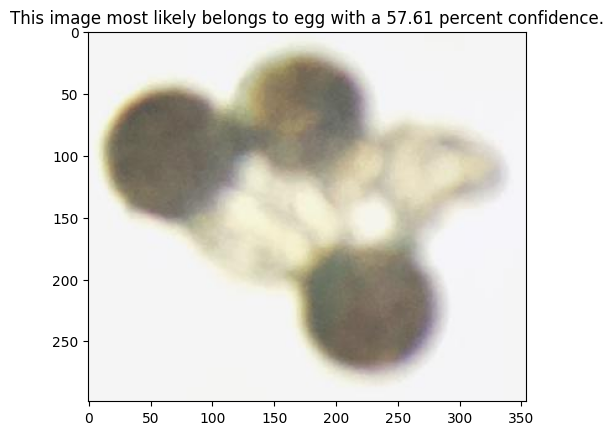

1/1 [==============================] - 0s 93ms/step
[1. 0. 0.]


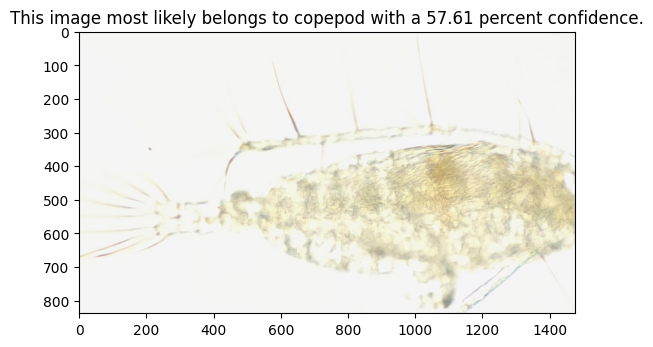

1/1 [==============================] - 0s 73ms/step
[1. 0. 0.]


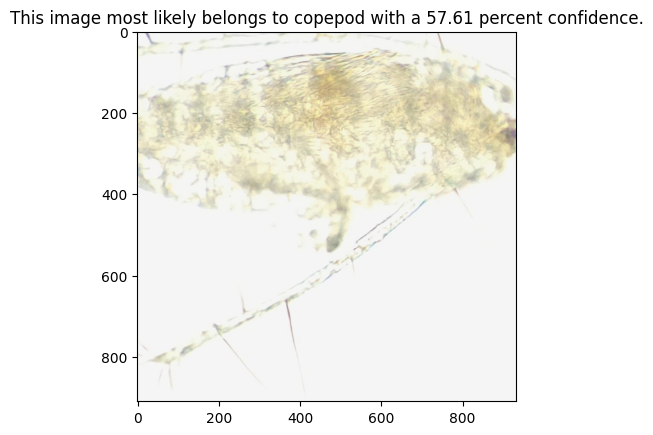

1/1 [==============================] - 0s 83ms/step
[1. 0. 0.]


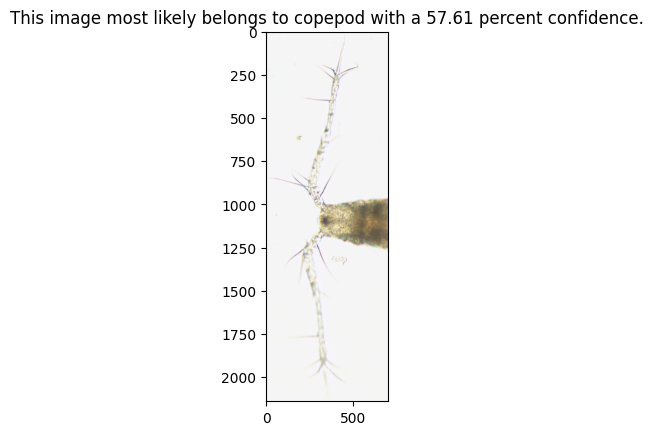

1/1 [==============================] - 0s 76ms/step
[1. 0. 0.]


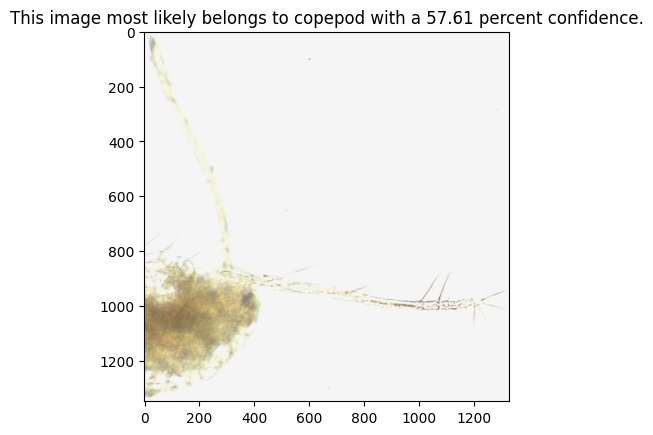

1/1 [==============================] - 0s 72ms/step
[1. 0. 0.]


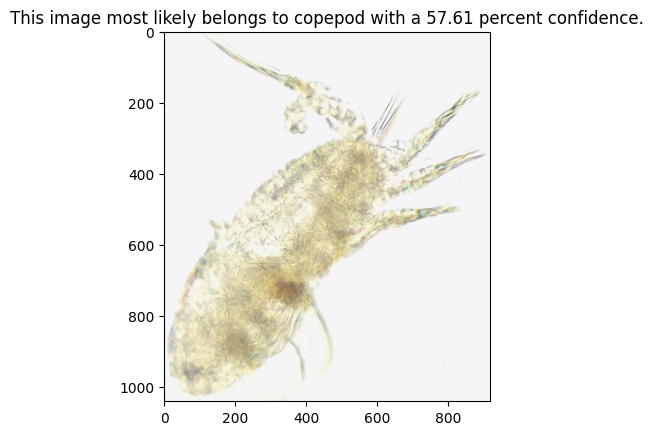

1/1 [==============================] - 0s 90ms/step
[1. 0. 0.]


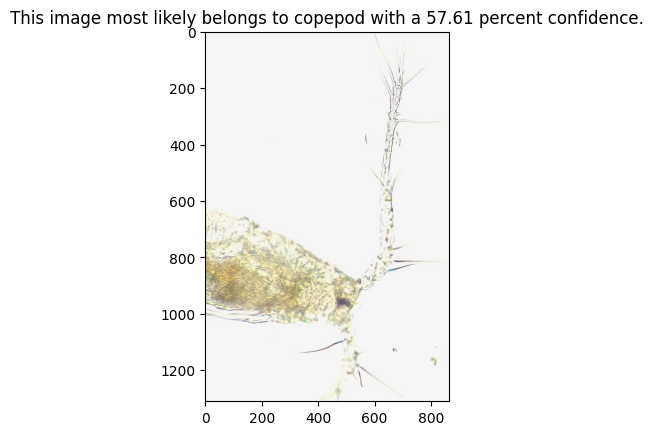

In [7]:
testdatadir = "testdata_folder/"

predictions = []
predicted_labels = []



for imgpath in os.listdir(testdatadir):
    path = testdatadir+imgpath
    img = tf.keras.utils.load_img(
        path, target_size=(224, 224)
    )

    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    prediction = model.predict(img_array)
    predictions.append(prediction)
    print(prediction[0])

    score = tf.nn.softmax(prediction[0])

    image = mpimg.imread(path) # images are color images

    plt.figure()
    plt.imshow(image)
    plt.title("This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score)))
    plt.show()